# <center>**Проект**: ***Предсказание результата маркетинговой компании банка***

<p align="center">

  <img width="1200" height="630" src="https://processer.media/wp-content/uploads/2021/09/bank_fintech.png">

</p>



В данном проекте мы решаем настоящую задачу, которая часто встаёт перед аналитиками, работающими в банковском секторе.

Банки хранят огромные объёмы информации о своих клиентах. Эти данные можно использовать для того, чтобы оставаться на связи с клиентами и индивидуально ориентировать их на подходящие именно им продукты или банковские предложения.

Обычно с выбранными клиентами связываются напрямую через разные каналы связи: лично (например, при визите в банк), по телефону, по электронной почте, в мессенджерах и так далее. Этот вид маркетинга называется прямым маркетингом. На самом деле, прямой маркетинг используется для взаимодействия с клиентами в большинстве банков и страховых компаний. Но, разумеется, проведение маркетинговых кампаний и взаимодействие с клиентами — это трудозатратно и дорого.

→ Банкам хотелось бы уметь выбирать среди своих клиентов именно тех, которые с наибольшей вероятностью воспользуются тем или иным предложением, и связываться именно с ними.

У нас есть данные о последней маркетинговой кампании, которую проводил банк: задачей было привлечь клиентов для открытия депозита. Наша задача проанализировать эти данные, выявить закономерность и найти решающие факторы, повлиявшие на то, что клиент вложил деньги именно в этот банк. Когда мы это сделаем, то поднимутся доходы банка и мы сможем понять целевую аудиторию, которую необходимо привлекать путём рекламы и различных предложений.

Данные принадлежат реальному банку.

**Бизнес-задача:** определить характеристики, по которым можно выявить клиентов, более склонных к открытию депозита в банке, и за счёт этого повысить результативность маркетинговой кампании.

**Техническая задача**  для специалиста в Data Science: построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать, воспользуется он предложением об открытии депозита или нет.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest, RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

Данные которые нам предоставили, можно разделить на несколько групп.\
Данные о клиентах банка:

- age (возраст);
- job (сфера занятости);
-marital (семейное положение);
-education (уровень образования);
-default (имеется ли просроченный кредит);
-housing (имеется ли кредит на жильё);
-loan (имеется ли кредит на личные нужды);
-balance (баланс).

Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:

- contact (тип контакта с клиентом);
-month (месяц, в котором был последний контакт);
- day (день, в который был последний контакт);
- duration (продолжительность контакта в секундах).  

Прочие признаки:

- campaign (количество контактов с этим клиентом в течение текущей кампании);
-pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
- previous (количество контактов до текущей кампании)
-poutcome (результат прошлой маркетинговой кампании).

И, разумеется, наша целевая переменная deposit, которая определяет, согласится ли клиент открыть депозит в банке. \
Именно её мы будем пытаться предсказать в данном кейсе. 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Проект 4/bank_fin.csv', sep = ';')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


Пропущенные значения есть в признаке 'balance'

### Задание 2

In [ ]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

Пропущенные значения в признаке 'job' обозначены словом unknown

### Задание 3

In [ ]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance'] = df['balance'].astype(str)
df['balance'] = df['balance'].apply(lambda x: x.replace('$','').replace(' ','').replace(',00', ''))
df['balance'] = df['balance'].astype(float)

In [ ]:
#найдем среднее по признаку 'balance'
round((df['balance'].sum()/(df['balance'].shape[0] - df['balance'].isna().sum())),2)

1529.13

### Задание 4

In [ ]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
df['balance'] = df['balance'].fillna(df['balance'].median())

In [ ]:
#найдем среднее по признаку 'balance'
round(df['balance'].mean(),2)

1526.94

### Задание 5

In [ ]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
job_mode = df['job'].mode()[0]
education_mode = df['education'].mode()[0]
df['job'] = df['job'].apply(lambda x: job_mode if x == 'unknown' else x)
df['education'] = df['education'].apply(lambda x: education_mode if x == 'unknown' else x)


После замены пропусков рассчитайте средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования (т. е. для тех, у кого одновременно самая популярная работа и самое популярное образование). Ответ округлите до трёх знаков после точки-разделителя.

In [ ]:
mask1 = df['job'] == df['job'].mode()[0]
mask2 = df['education'] == df['education'].mode()[0]
round(df[mask1&mask2]['balance'].mean(),3)

1598.883

### Задание 6

In [ ]:
# удалите все выбросы для признака balance
# используем метод Тьюки
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

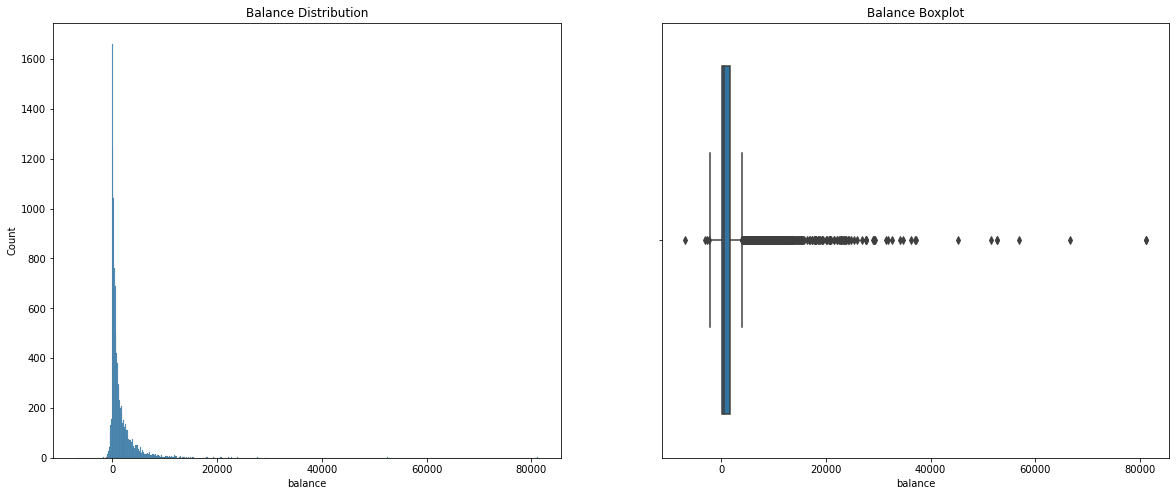

In [ ]:
#Построим гистограмму и коробчатую диаграмму для признака 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
histplot = sns.histplot(data=df, x='balance', ax=axes[0]);
histplot.set_title('Balance Distribution');
boxplot = sns.boxplot(data=df, x='balance', ax=axes[1]);
boxplot.set_title('Balance Boxplot');

In [ ]:
#Применим эту функцию к таблице df и признаку balance, а также выведем
#размерности результатов
outliers, cleaned = outliers_iqr(df, 'balance')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 1057
Результирующее число записей: 10105


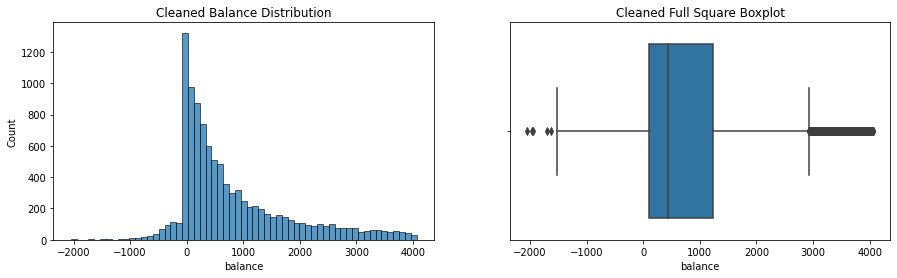

In [ ]:
# построим гистограмму и коробчатую диаграмму на новых данных 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='balance', ax=axes[0]);
histplot.set_title('Cleaned Balance Distribution');
boxplot = sns.boxplot(data=cleaned, x='balance', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

# Часть 2:  Разведывательный анализ

### Задание 1

no     0.536764
yes    0.463236
Name: deposit, dtype: float64

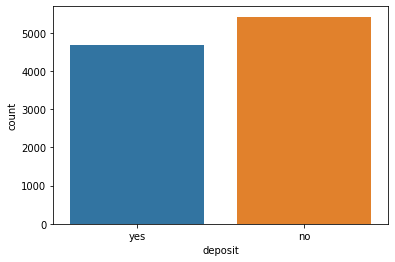

In [ ]:
# изучаем соотношение классов в данных на предмет несбалансированности
display(cleaned['deposit'].value_counts(normalize=True))
sns.countplot(data=cleaned, x='deposit');

Классы в целевом признаке сбалансированы

### Задание 2

In [ ]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10105.0,40.895497,11.734931,18.0,32.0,38.0,48.0,95.0
balance,10105.0,807.653538,994.151966,-2049.0,95.0,445.0,1227.0,4063.0
day,10105.0,15.590302,8.441510,1.0,8.0,15.0,22.0,31.0
duration,10105.0,368.742603,346.651524,2.0,137.0,252.0,490.0,3881.0
campaign,10105.0,2.517170,2.707159,1.0,1.0,2.0,3.0,43.0
pdays,10105.0,51.319644,109.644179,-1.0,-1.0,-1.0,2.0,854.0
previous,10105.0,0.816230,2.243795,0.0,0.0,0.0,1.0,58.0


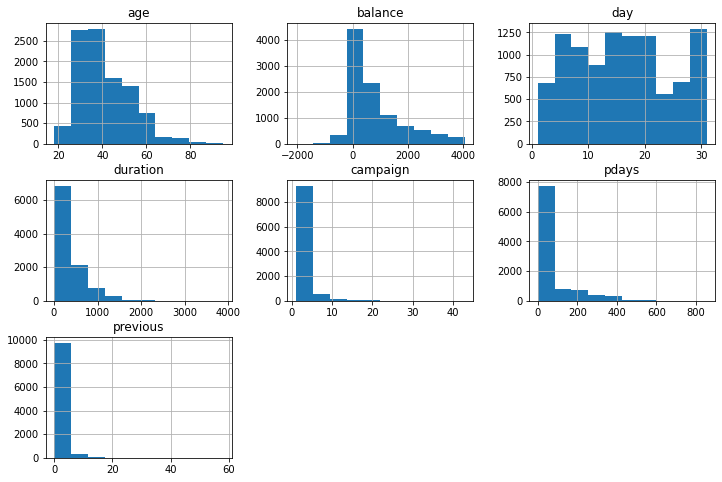

In [ ]:
cleaned.hist(figsize=(12,8));

В признаках 'age', 'campaign', 'pdays', 'previous' возможны выбросы. 
Все числовые признаки нуждаются в нормализации, т.к. нормального распределения не наблюдается.

### Задание 3

In [ ]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
df.describe(include=[object]).T
#постройте визуализации, иллюстрирующие результаты

,count,unique,top,freq
job,11162,11,management,2636
marital,11162,3,married,6351
education,11162,3,secondary,5973
default,11162,2,no,10994
housing,11162,2,no,5881
loan,11162,2,no,9702
contact,11162,3,cellular,8042
month,11162,12,may,2824
poutcome,11162,4,unknown,8326
deposit,11162,2,no,5873


Из 10 категориальных признаков 4 бинарных. 

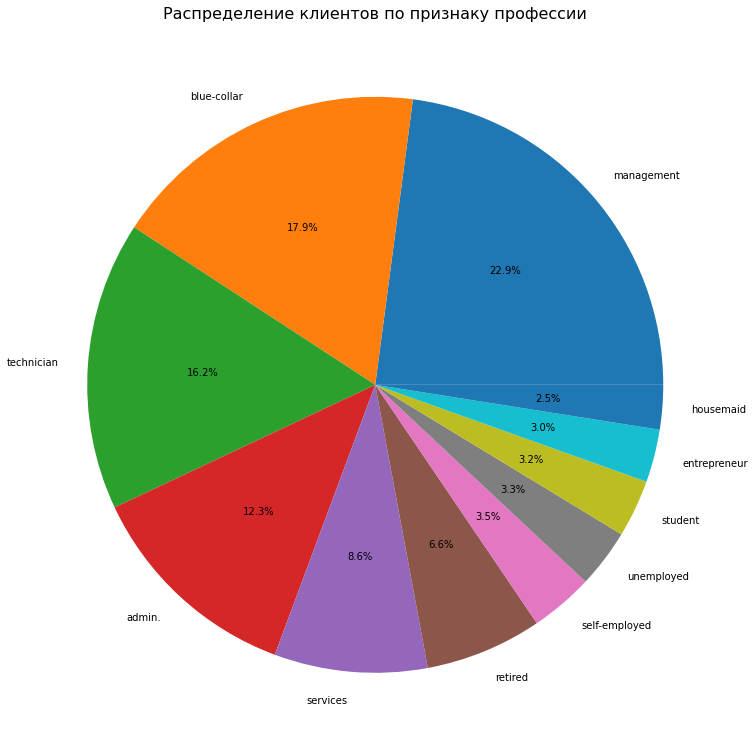

In [181]:
#построим круговую диаграмму для признака 'job'
df_job = cleaned['job'].value_counts()
fig = plt.figure(figsize=(10, 10))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df_job,
    labels=df_job.index,
    autopct='%.1f%%'
);
axes.set_title("Распределение клиентов по признаку профессии", fontsize=16);

В признаке 'job' 11 уникальных значений. Больше всего среди клиентов менеджеров, голубых воротничков, и технических специалистов. В сумме 57%

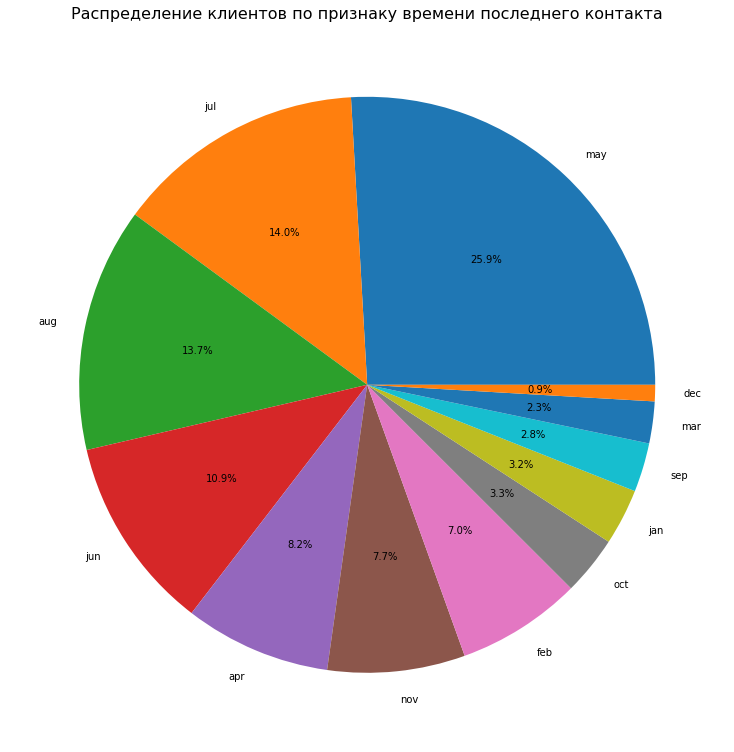

In [182]:
#построим круговую диаграмму для признака 'month'
df_month = cleaned['month'].value_counts()
fig = plt.figure(figsize=(10, 10))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df_month,
    labels=df_month.index,
    autopct='%.1f%%'
);
axes.set_title("Распределение клиентов по признаку времени последнего контакта", fontsize=16);

Более четверти (25,9%) всех последних контактов были в мае,  29,6% контактов были в летние месяцы. Возможно это связано со сроками конкретной маркетинговой компании и с временем формирования базы данных. 

In [ ]:
#отсортируем категориальные столбцы
cat_cols = list(df.select_dtypes(include=['object']).columns)

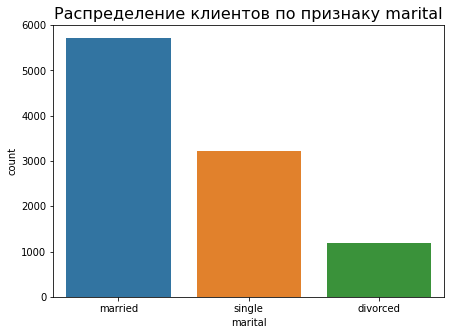

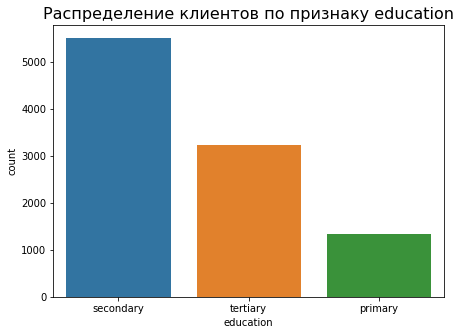

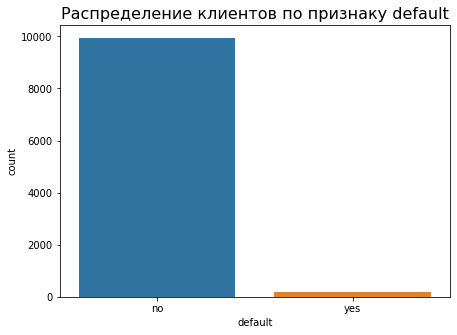

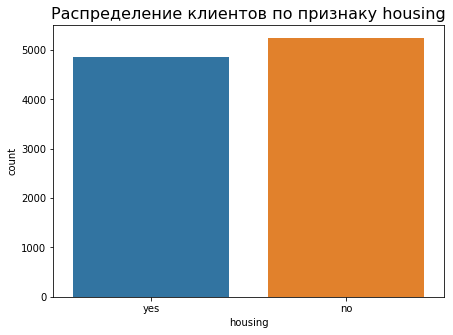

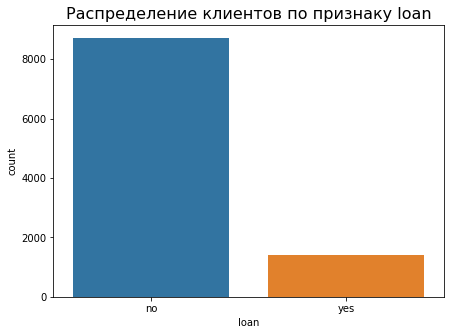

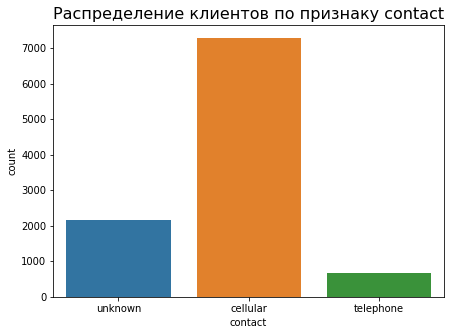

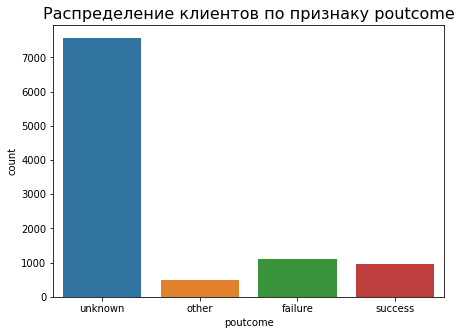

In [183]:
#визуализируем распределение остальных столбцов
cat_cols_visual = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for _ in cat_cols_visual:
  fig = plt.figure(figsize=(7, 5))
  countplot = sns.countplot(data=cleaned, x=_);
  countplot.set_title(f"Распределение клиентов по признаку {_}", fontsize=16);

Больше всего среди клиентов банка попавших в датасет более всего клиентов, состоящих в браке.   
Образование преимущественно среднее, без просроченных кредитов.  
Примерно половина имеет ипотечный кредит.   
Большинство не имеет кредитов на личные нужды.  
Банк в значительном количестве случаев 72% контактирует с клиентами посредством сотовой связи.  
У 74,6% неизвестен результат прошлой маркетинговой компании. Возможно эти люди впервые стали объектом для маркетнговой акции. 

### Задание 4

In [ ]:
# Узнаем, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
cleaned.groupby(by = ['poutcome', 'deposit'])['deposit'].count()

poutcome  deposit
failure   no          562
          yes         547
other     no          216
          yes         265
success   no           84
          yes         861
unknown   no         4562
          yes        3008
Name: deposit, dtype: int64

Ответ: успех в текущей маркетинговой кампании превалирует над количеством неудач у категории клиентов в статусе 'success' (успешно)

### Задание 5

In [ ]:
# узнаем, в каком месяце чаще всего отказывались от предложения открыть депозит
cleaned[cleaned['deposit'] == "no"].groupby(by = ['deposit','month'])['deposit'].count().sort_values(ascending = False)

deposit  month
no       may      1776
         jul       836
         aug       775
         jun       606
         nov       456
         feb       323
         apr       317
         jan       194
         oct        62
         sep        46
         mar        24
         dec         9
Name: deposit, dtype: int64

Чаще всего отказывались от предложения открыть депозит в мае, однако это может быть связано со сроками проведения компании, т.к. и контактов в мае было больше всего.

### Задание 6

In [ ]:
# создайте возрастные группы и определите, в каких группах более склонны открывать
# депозит, чем отказываться от предложения
def age_feat(age):
  if age < 30:
    return '<30'
  elif 30 <= age < 40:
    return '30-40'
  elif 40 <= age < 50:
    return '40-50'
  elif 50 <= age < 60:
    return '50-60'
  else:
    return '60+'

In [ ]:
#применим созданную функцию для замены значений признака 
cleaned['age'] = cleaned['age'].apply(age_feat)

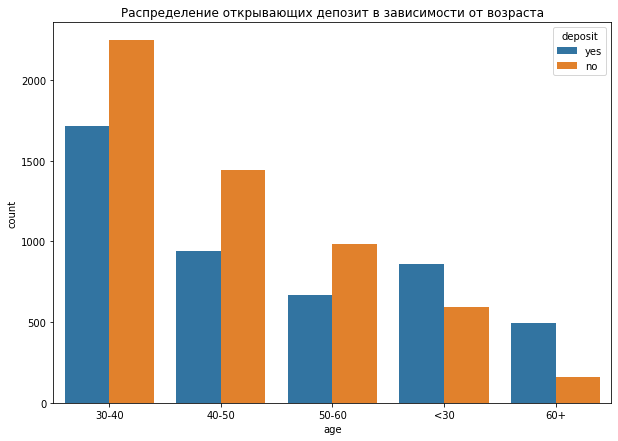

In [ ]:
#визуализируем получившееся распределение
fig = plt.figure(figsize=(10, 7))

barplot = sns.countplot(
    data=cleaned,
    x='age',
    hue='deposit',
    order=['30-40', '40-50', '50-60', '<30', '60+']
)
barplot.set_title('Распределение открывающих депозит в зависимости от возраста');

В абсолютном выражении больше всего открывших счет наблюдается в возрастной группе 30-40 лет. Наименьшее количество в возрастной группе 60+

In [152]:
n = cleaned[cleaned['deposit'] == "no"].groupby(by = ['deposit','age'])['deposit'].count()
y = cleaned[cleaned['deposit'] == "yes"].groupby(by = ['deposit','age'])['deposit'].count()
for _ in range(0,len(n)):
  print(f'Доля открывающих депозит в категории {n.index[_][1]} от общего числа клиентов данного возраста  = {round((y[_]/(y[_]+n[_])*100),1)}%')
  _+=1

Доля открывающих депозит в категории 30-40 от общего числа клиентов данного возраста  = 43.3%
Доля открывающих депозит в категории 40-50 от общего числа клиентов данного возраста  = 39.4%
Доля открывающих депозит в категории 50-60 от общего числа клиентов данного возраста  = 40.5%
Доля открывающих депозит в категории 60+ от общего числа клиентов данного возраста  = 76.0%
Доля открывающих депозит в категории <30 от общего числа клиентов данного возраста  = 59.2%


Однако, в относительном выражении в возрастной группе больше всего клиентов 76% реагируют на маркетинговое предложение и открывают счет. Наименьшие проценты в возрастных группах 40-50 лет (39.4%), 50-60 лет(40.5%) и 30-40 лет(43.3%)

### Задание 7

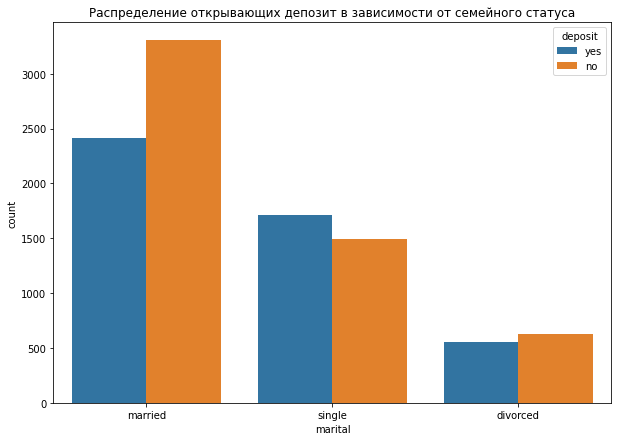

In [156]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
fig = plt.figure(figsize=(10, 7))

barplot = sns.countplot(
    data=cleaned,
    x='marital',
    hue='deposit',
)
barplot.set_title('Распределение открывающих депозит в зависимости от семейного статуса');

In [154]:
n = cleaned[cleaned['deposit'] == "no"].groupby(by = ['deposit','marital'])['deposit'].count()
y = cleaned[cleaned['deposit'] == "yes"].groupby(by = ['deposit','marital'])['deposit'].count()
for _ in range(0,len(n)):
  print(f'Доля открывающих депозит в категории {n.index[_][1]} от общего числа клиентов данной категории  = {round((y[_]/(y[_]+n[_])*100),1)}%')
  _+=1

Доля открывающих депозит в категории divorced от общего числа клиентов данной категории  = 47.0%
Доля открывающих депозит в категории married от общего числа клиентов данной категории  = 42.2%
Доля открывающих депозит в категории single от общего числа клиентов данной категории  = 53.4%


В целом по графику видно, что доля реагирующих на маркетинговое предложение и нет сбалансировано по признаку нахождения в браке. И тем не менее чуть сильнее на предложение реагируют люди одинокие 53.4%

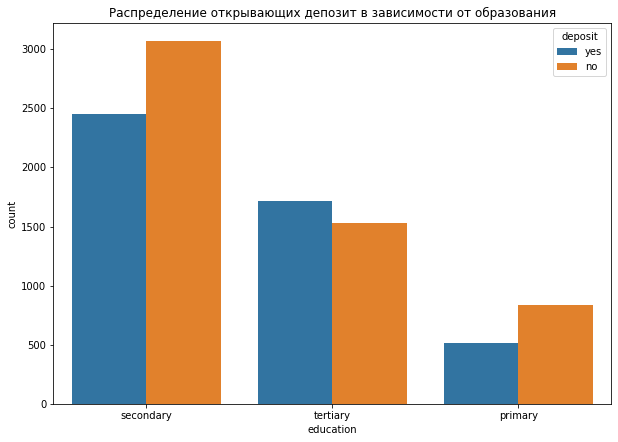

In [ ]:
# построим визуализацию для открывших и неоткрывших депозит в зависимости от образования
fig = plt.figure(figsize=(10, 7))

barplot = sns.countplot(
    data=cleaned,
    x='education',
    hue='deposit',
)
barplot.set_title('Распределение открывающих депозит в зависимости от образования');

In [157]:
n = cleaned[cleaned['deposit'] == "no"].groupby(by = ['deposit','education'])['deposit'].count()
y = cleaned[cleaned['deposit'] == "yes"].groupby(by = ['deposit','education'])['deposit'].count()
for _ in range(0,len(n)):
  print(f'Доля открывающих депозит в категории {n.index[_][1]} от общего числа клиентов данной категории  = {round((y[_]/(y[_]+n[_])*100),1)}%')
  _+=1

Доля открывающих депозит в категории primary от общего числа клиентов данной категории  = 38.3%
Доля открывающих депозит в категории secondary от общего числа клиентов данной категории  = 44.4%
Доля открывающих депозит в категории tertiary от общего числа клиентов данной категории  = 52.9%


Доля реагирующих на маркетинговое предложение выше среди людей с высшим образованием 52,9%, наименьшее среди людей с начальным образованием 38,3%

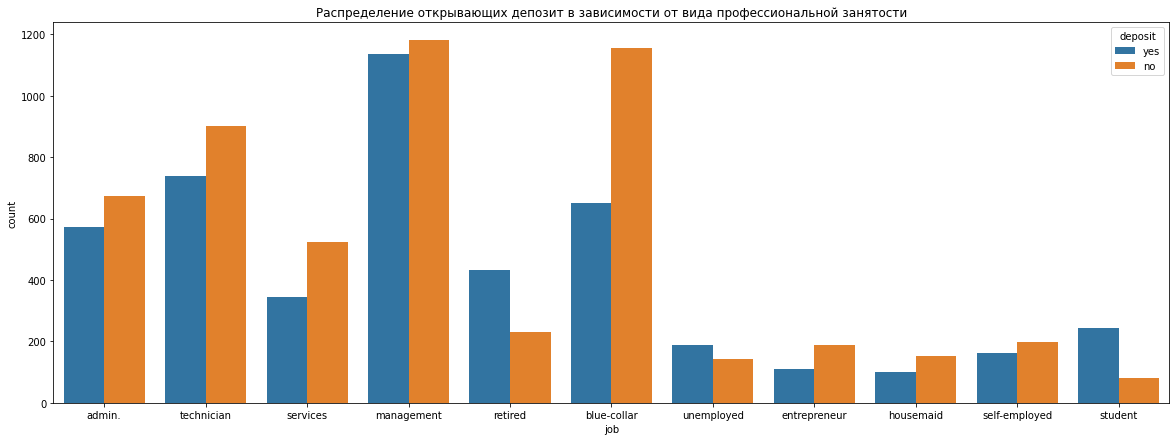

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
fig = plt.figure(figsize=(20, 7))

barplot = sns.countplot(
    data=cleaned,
    x='job',
    hue='deposit',
)
barplot.set_title('Распределение открывающих депозит в зависимости от вида профессиональной занятости');

In [158]:
n = cleaned[cleaned['deposit'] == "no"].groupby(by = ['deposit','job'])['deposit'].count()
y = cleaned[cleaned['deposit'] == "yes"].groupby(by = ['deposit','job'])['deposit'].count()
for _ in range(0,len(n)):
  print(f'Доля открывающих депозит в категории {n.index[_][1]} от общего числа клиентов данной категории  = {round((y[_]/(y[_]+n[_])*100),1)}%')
  _+=1

Доля открывающих депозит в категории admin. от общего числа клиентов данной категории  = 46.1%
Доля открывающих депозит в категории blue-collar от общего числа клиентов данной категории  = 36.1%
Доля открывающих депозит в категории entrepreneur от общего числа клиентов данной категории  = 37.0%
Доля открывающих депозит в категории housemaid от общего числа клиентов данной категории  = 39.3%
Доля открывающих депозит в категории management от общего числа клиентов данной категории  = 49.0%
Доля открывающих депозит в категории retired от общего числа клиентов данной категории  = 65.2%
Доля открывающих депозит в категории self-employed от общего числа клиентов данной категории  = 45.0%
Доля открывающих депозит в категории services от общего числа клиентов данной категории  = 39.7%
Доля открывающих депозит в категории student от общего числа клиентов данной категории  = 75.2%
Доля открывающих депозит в категории technician от общего числа клиентов данной категории  = 45.1%
Доля открывающих 

Наиболее склонны к реагированию на маркетинговые предложения студенты(75,2%), пенсионеры(retired)(65,2%) и безработные 56,9%. Наименее рабочие(36,1%) и предприниматели (37%)

### Задание 8

In [ ]:
# построим сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
df_yes = cleaned[cleaned['deposit']=='yes']
df_no = cleaned[cleaned['deposit']=='no']
table_y = pd.pivot_table(df_yes, values='deposit', index=['education'],
                    columns=['marital'], aggfunc= 'count')
table_n = pd.pivot_table(df_no, values='deposit', index=['education'],
                    columns=['marital'], aggfunc= 'count')

In [170]:
#создадим таблицу с относительными значениями открывших счет по категориям 
#образование и семейный статус
f = round((table_y/(table_n+table_y)*100),2)
print(f)

marital    divorced  married  single
education                           
primary       51.34    34.59   45.05
secondary     43.34    41.33   50.37
tertiary      51.63    48.51   58.71


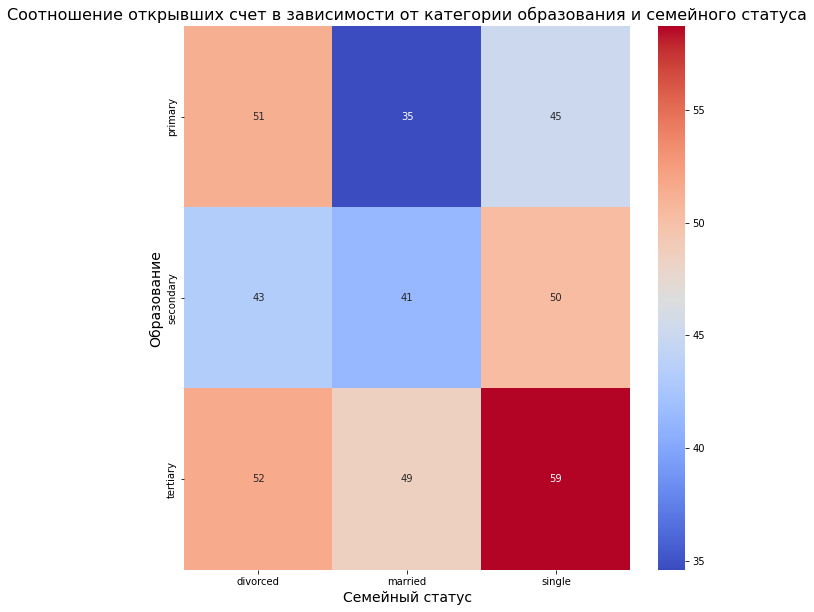

In [178]:
#визуализируем полученное соотношение
fig = plt.figure(figsize=(10, 10))
heatmap_ax = sns.heatmap(f, annot = True, cmap= 'coolwarm');
heatmap_ax.axes.set_title("Соотношение открывших счет в зависимости от категории образования и семейного статуса", fontsize=16)
heatmap_ax.set_xlabel("Семейный статус", fontsize=14)
heatmap_ax.set_ylabel("Образование", fontsize=14);


Из представленной тепловой карты  видно, что более всего склонны положительно реагировать на маркетнговое предложение одинокие люди с высшим образованием 59% и менее всего женатые люди с начальным образованием (35%)

# Часть 3: Преобразование данных

### Задание 1

In [ ]:
# преобразуйте уровни образования и возраста
df_copy = cleaned.copy()
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_label = l_encoder.fit_transform(df_copy['education'])
df_copy['education'] = data_label
data_label = l_encoder.fit_transform(df_copy['age'])
df_copy['age'] = data_label


### Задание 2

In [ ]:
# преобразуйте бинарные переменные в представление из нулей и единиц
for column in cat_cols:
  print('Число уникальных значений признака {}: '.format(column), df_copy[column].nunique())



Число уникальных значений признака job:  11
Число уникальных значений признака marital:  3
Число уникальных значений признака education:  3
Число уникальных значений признака default:  2
Число уникальных значений признака housing:  2
Число уникальных значений признака loan:  2
Число уникальных значений признака contact:  3
Число уникальных значений признака month:  12
Число уникальных значений признака poutcome:  4
Число уникальных значений признака deposit:  2


In [ ]:
df_copy['default'] = df_copy['default'].apply(lambda x: 1 if x == 'yes' else 0)
df_copy['housing'] = df_copy['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df_copy['loan'] = df_copy['loan'].apply(lambda x: 1 if x == 'yes' else 0)
df_copy['deposit'] = df_copy['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

In [186]:
#выделим оставшиеся категориальные столбцы
cat_cols = list(df_copy.select_dtypes(include=['object']).columns)
cat_cols

['job', 'marital', 'contact', 'month', 'poutcome']

### Задание 3

In [ ]:
# создадим дамми-переменные
df_dummies = pd.get_dummies(df_copy, columns=cat_cols)

In [ ]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10105 non-null  int64  
 1   education          10105 non-null  int64  
 2   default            10105 non-null  int64  
 3   balance            10105 non-null  float64
 4   housing            10105 non-null  int64  
 5   loan               10105 non-null  int64  
 6   day                10105 non-null  int64  
 7   duration           10105 non-null  int64  
 8   campaign           10105 non-null  int64  
 9   pdays              10105 non-null  int64  
 10  previous           10105 non-null  int64  
 11  deposit            10105 non-null  int64  
 12  job_admin.         10105 non-null  uint8  
 13  job_blue-collar    10105 non-null  uint8  
 14  job_entrepreneur   10105 non-null  uint8  
 15  job_housemaid      10105 non-null  uint8  
 16  job_management     101

### Задание 4

In [ ]:
# построим корреляционную матрицу и оценим данные на предмет наличия мультиколлинеарности
def show_corr_heatmap(df, columns_list, title, method):
    """Построение корреляционной диаграммы"""
    fig_, ax_ = plt.subplots(figsize=(30, 24))
    corr = df[columns_list].corr(method=method)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, 
                annot=True, 
                linewidths=0.1, 
                ax=ax_, 
                mask=mask, 
                cmap='viridis',
                fmt='.1g')
    ax_.set_title(title, fontsize=18)
    plt.show()

In [ ]:
#выделим столбцы для построения корреляционной heatmap
cols_p1 = df_dummies.columns

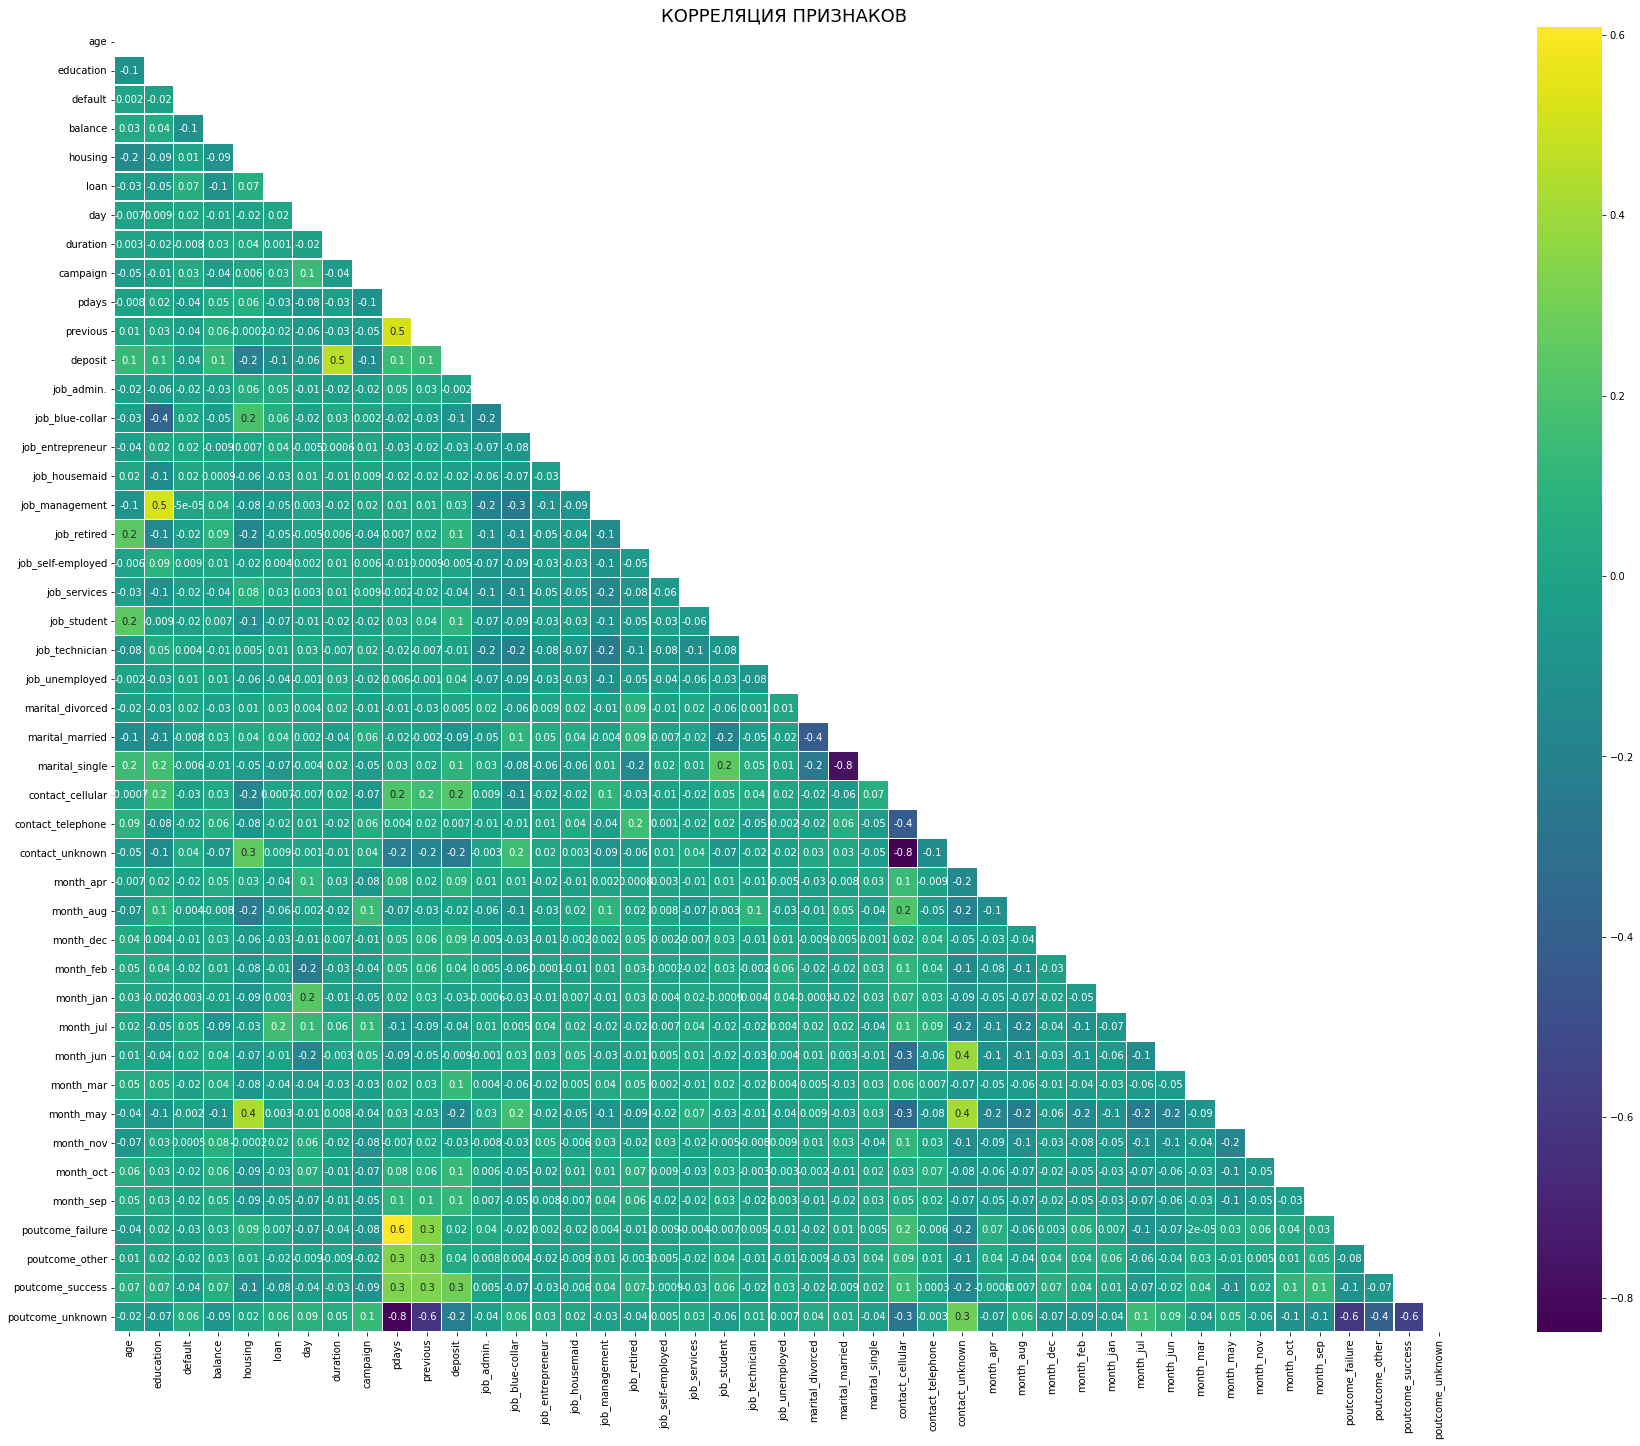

In [ ]:
#строим диаграмму для непрерывных признаков:
show_corr_heatmap( df_dummies, cols_p1, 'КОРРЕЛЯЦИЯ ПРИЗНАКОВ', method='pearson');

Сильной корреляции >0.9 не обнаружено. 

### Задание 5

In [ ]:
#разделим выборку на тренировочную и тестовую
X = df_dummies.drop(['deposit'], axis=1)
y = df_dummies['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

### Задание 6

In [ ]:
# с помощью SelectKBest отберём 15 наиболее подходящих признаков
selector = SelectKBest(f_classif, k=15)
selector.fit(X_train, y_train)

SelectKBest(k=15)

In [ ]:
best_col = list(selector.get_feature_names_out())
best_col.append('deposit')
best_col

['age',
 'balance',
 'housing',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'contact_cellular',
 'contact_unknown',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'poutcome_success',
 'poutcome_unknown',
 'deposit']

In [ ]:
#Оставим только те признаки, которые были найдены на этапе отбора (по важности)
df = df_dummies[best_col]
#Выполним разбиение на train и test вновь:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

### Задание 7

In [ ]:
#Выполним масштабирование данных:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [ ]:
# обучим логистическую регрессию и рассчитаем метрики качества
log_reg = linear_model.LogisticRegression(random_state=42, solver = 'sag', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1790
           1       0.83      0.73      0.78      1545

    accuracy                           0.80      3335
   macro avg       0.81      0.80      0.80      3335
weighted avg       0.81      0.80      0.80      3335



In [187]:
#рассчитаем метрики для тренировочной выборки
y_pred_train = log_reg.predict(X_train_scaled)
print(metrics.classification_report(y_train, y_pred_train
                                    ))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      3634
           1       0.84      0.76      0.80      3136

    accuracy                           0.82      6770
   macro avg       0.83      0.82      0.82      6770
weighted avg       0.83      0.82      0.82      6770



### Задание 2

In [188]:
# обучим модель по алгоритму решающих деревьев
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
#Обучаем дерево по алгоритму CART
dt.fit(X_train_scaled, y_train)
#Выводим значения метрики f1
y_train_pred = dt.predict(X_train_scaled)
print('Train f1_score: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = dt.predict(X_test_scaled)
print('Test f1_score: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train f1_score: 1.00
Test f1_score: 0.72


Выявляется переобучение. Необходим подбор оптимальных гиперпараметров.

### Задание 3

In [191]:
# подберём оптимальные параметры с помощью gridsearch
param_grid = [{
              'min_samples_split': [2, 5, 7, 10],
              'max_depth':[3,5,7]}
              ]
grid_search_1 = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search_1.fit(X_train_scaled, y_train) 
y_test_pred = grid_search_1.predict(X_test_scaled)
y_train_pred = grid_search_1.predict(X_train_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print('f1_score на тренировочном наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print("accuracy на тестовом наборе: {:.2f}".format(grid_search_1.score(X_test_scaled, y_test)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_1.best_params_))

CPU times: user 169 ms, sys: 10.4 ms, total: 180 ms
Wall time: 1.38 s
f1_score на тестовом наборе: 0.80
f1_score на тренировочном наборе: 0.82
accuracy на тестовом наборе: 0.81
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 5}


За счет подбора гиперпараметров удалось улучшить метрику accuracy для тестового набора данных и избавиться от переобучения

# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [ ]:
# обучим модель случайный лес
# создаем объект класса случайный лес
rf_clf= ensemble.RandomForestClassifier(
    n_estimators=100, #число деревьев
    criterion='gini', #критерий эффективности
    max_depth=10, #максимальная глубина дерева
    min_samples_leaf = 5, #число признаков из метода случайных подространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf.fit(X_train_scaled, y_train)

#Делаем предсказание класса
y_pred = rf_clf.predict(X_test_scaled)
#Выводим отчет о метриках
print(metrics.classification_report(y_test, y_pred))
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335

f1_score на тестовом наборе: 0.82


Ещё немного улучшили метрику f1_score на тестовом наборе

### Задание 2

In [192]:
# используем для классификации градиентный бустинг и сравним качество со случайным лесом
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gb = GradientBoostingClassifier(
    loss='deviance', #функция потерь
    learning_rate=0.1, #темп обучения
    n_estimators=100, #число деревьев
    max_depth=7, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
print(classification_report(y_test, y_pred_gb))
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_pred_gb)))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335

f1_score на тестовом наборе: 0.82


Метрики не удалось улучшить

### Задание3

In [ ]:
# объединим уже известные нам алгоритмы с помощью стекинга 
from sklearn.ensemble import StackingClassifier

#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('gb', GradientBoostingClassifier(n_estimators=300, 
                          learning_rate=0.05, 
                          min_samples_leaf=5, 
                          max_depth=5, 
                          random_state=42)),
    ('log_reg', linear_model.LogisticRegression(solver='sag', 
                                                max_iter=1000, 
                                                random_state=42)),
    ('dt', tree.DecisionTreeClassifier(criterion='entropy', 
                                       max_depth=7, 
                                       min_samples_split=2, 
                                       random_state=42))]

#Создаем объект класса стекинг
reg = StackingClassifier(
    estimators=estimators,
    final_estimator=linear_model.LogisticRegression(random_state=42)
)
#Обучаем модель
reg.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=5,
                                                           min_samples_leaf=5,
                                                           n_estimators=300,
                                                           random_state=42)),
                               ('log_reg',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42,
                                                   solver='sag')),
                               ('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=7,
                                                       random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

In [194]:
#делаем предсказание с помощью модели стекинга
y_pred_stack = reg.predict(X_test_scaled)
print(classification_report(y_test, y_pred_stack))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1790
           1       0.80      0.81      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



Метрики не удалось улучшить

### Задание 4

<BarContainer object of 15 artists>

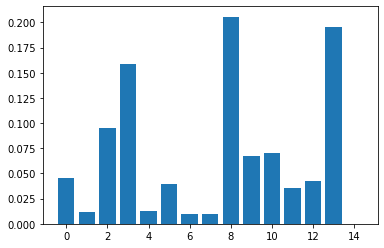

In [ ]:
#оценим важность признаков на модели градиентного бустинга
import xgboost as xgb
# fit the model
model_xgb_numpy = xgb.XGBRegressor(n_jobs=-1,objective='reg:squarederror')
model_xgb_numpy.fit(X_train_scaled, y_train)

plt.bar(range(len(model_xgb_numpy.feature_importances_)), model_xgb_numpy.feature_importances_)

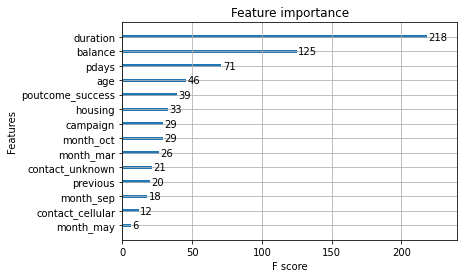

In [ ]:
# fit the model
model_xgb_pandas = xgb.XGBRegressor(n_jobs=-1,objective='reg:squarederror')
model_xgb_pandas.fit(X_train, y_train)
axsub = xgb.plot_importance(model_xgb_pandas)

Наиболее повлияли на целевой признак предикторы 'duration'(продолжительность контакта), 'balance'(баланс по счету) и 'pdays' (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании)

### Задание 5

In [ ]:
# реализуем оптимизацию гиперпараметров с помощью Optuna
# Установим библиотеку
!pip install optuna
import optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 5.1 MB/s 
     |████████████████████████████████| 209 kB 58.4 MB/s 
     |████████████████████████████████| 81 kB 10.5 MB/s 
     |████████████████████████████████| 78 kB 6.1 MB/s 
     |████████████████████████████████| 49 kB 6.7 MB/s 
     |████████████████████████████████| 112 kB 57.1 MB/s 
     |████████████████████████████████| 147 kB 52.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=8fe424a93bae0859f278a5de9b692aa2f01556394fc5bd0c167b5fe35e4ec405
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [199]:

def optuna_rf(trial):
  """ Программа для поиска оптимальных гиперпараметров
      return: значение метрики f1 для тренировочной выборки """
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_test, model.predict(X_test_scaled))

  return score

In [200]:
%%time
# cоздадим объект исследования
# напрямую укажем, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# найдём лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2022-08-11 18:43:22,029] A new study created in memory with name: RandomForestClassifier
[I 2022-08-11 18:43:23,736] Trial 0 finished with value: 0.8122823678379234 and parameters: {'n_estimators': 186, 'max_depth': 21, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8122823678379234.
[I 2022-08-11 18:43:24,990] Trial 1 finished with value: 0.8139682539682539 and parameters: {'n_estimators': 134, 'max_depth': 12, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.8139682539682539.
[I 2022-08-11 18:43:25,915] Trial 2 finished with value: 0.8110863332271423 and parameters: {'n_estimators': 100, 'max_depth': 11, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.8139682539682539.
[I 2022-08-11 18:43:27,086] Trial 3 finished with value: 0.8174352495262162 and parameters: {'n_estimators': 116, 'max_depth': 25, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.8174352495262162.
[I 2022-08-11 18:43:28,254] Trial 4 finished with value: 0.8170616113744077 and parameters: {'

CPU times: user 23.2 s, sys: 57.8 ms, total: 23.2 s
Wall time: 24.4 s


In [201]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 167, 'max_depth': 14, 'min_samples_leaf': 7}
f1_score на обучающем наборе: 0.82


Метрику улучшить не удалось. Однако найдены оптимальные параметры модели.

In [202]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42 )
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.83
f1_score на тестовом наборе: 0.82


Метрики также улучшить не удалоь

Рассмотрим различные визуализации, доступные через Optuna, которые помогают принимать лучшие решения, видеть влияние различных гиперпараметров на производительность модели.

Сначало необходимо проверить, доступна ли поддержка визуализации: is_available (), т.е. доступны ли правильные версии plotly и matplotlib для создания визуализаций.

In [ ]:
optuna.visualization.is_available()

True

График истории оптимизации - отображает количество испытаний на оси Х и метрику на оси Y.

Следует использовать эту диаграмму, чтобы проверить, идет ли оптимизация гиперпараметров в правильном направлении или нет.

In [203]:
optuna.visualization.plot_optimization_history(study, target_name="f1_score")

В нашем случае, все идет верно, метрика максимизируется.

In [204]:
optuna.visualization.plot_param_importances(study, target_name="f1_score")

Из этого графика можно сделать вывод, что стоит обратить большее внимание на настройку гиперпараметра min_sampeles_leaf

График контура отношений гиперпараметров

Он показывает связь между различными комбинациями гиперпараметров и значение метрики для этих комбинаций в виде контурного графика.

In [205]:
optuna.visualization.plot_contour(study, params=["max_depth", "n_estimators"],
                                  target_name="f1_score")

Точки с белым фоном это и есть лучшии комбинации n_estimator, max_depth.
















Результаты:  
* модель логистическая регрессия 

f1-score на тестовом наборе 0.78  
accuracy на тестовом наборе 0.80

* модель алгоритм решающих деревьев(по умолчанию)  

Train f1_score: 1.00(переобучение)  
Test f1_score: 0.72

* модель алгоритм решающих деревьев(подбор гиперпараметров по методу GridSearchCV)

f1_score на тестовом наборе: 0.80  
f1_score на тренировочном наборе: 0.82   
accuracy на тестовом наборе: 0.81  
Переобучения нет, метка f1_score на тестовом наборе улучшилась

* модель случайный лес

f1_score на тестовом наборе: 0.82  
accuracy на тестовом наборе: 0.83

* модель градиентного бустинга

f1_score на тестовом наборе: 0.82  
accuracy на тестовом наборе: 0.83

* модель стекинга

f1_score на тестовом наборе: 0.82  
accuracy на тестовом наборе: 0.83

* поиск гиперпараметров с помощью Optuna

f1_score на тестовом наборе: 0.82  
accuracy на тестовом наборе: 0.83

Выводы: Найдены оптимальные параметры моделей машинного обучения.   
Достигнуты максимальные метрики на тестовом наборе на ряде моделей машинного обучения.  
Наибольшее значение метрик: f1_score 0.82, accuracy 0.83.  
Максимальный вклад в предсказание вносят такие предикторы, как длительность разговора по телефону, длительность перерыва между контактами и баланс на счету, чем больше, тем лучше. 
